# Comparing API Listner vs ContainerEvent Listner

In [70]:
# Loading event json
import json

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Comparison

In [71]:
with open('event-listners-comparison.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [72]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Utilisation'] = [float(line.split()[5]) for line in filtered]

In [73]:
with open('event-listners-comparison.txt', 'r') as file:
    container_events = [line.rstrip('\n') for line in file if "(container)" in line]
container_events

['2025/05/21 15:43:16.453387 (container) start watching function',
 '2025/05/21 15:43:16.456547 (container) received subscribe stream',
 '2025/05/21 15:43:29.528699 (container) ContainerCreate: detected new container: 2025-05-21T15:43:29.523142646Z',
 '2025/05/21 15:43:29.788985 (container) TaskStart: detected task start: 2025-05-21T15:43:29.783492865Z',
 '2025/05/21 15:43:29.826720 (container) ContainerCreate: detected new container: 2025-05-21T15:43:29.823458821Z',
 '2025/05/21 15:43:29.995984 (container) TaskStart: detected task start: 2025-05-21T15:43:29.991596133Z',
 '2025/05/21 15:43:34.431980 (container) TaskExit: detected task exit: 2025-05-21T15:43:34.42835646Z',
 '2025/05/21 15:43:34.548889 (container) TaskDelete: detected task delete: 2025-05-21T15:43:34.542273016Z',
 '2025/05/21 15:43:36.308427 (container) TaskExit: detected task exit: 2025-05-21T15:43:36.304228586Z',
 '2025/05/21 15:43:36.387514 (container) TaskDelete: detected task delete: 2025-05-21T15:43:36.382813405Z']

In [74]:
with open('event-listners-comparison.txt', 'r') as file:
    api_events = [line.rstrip('\n') for line in file if "(api)" in line]

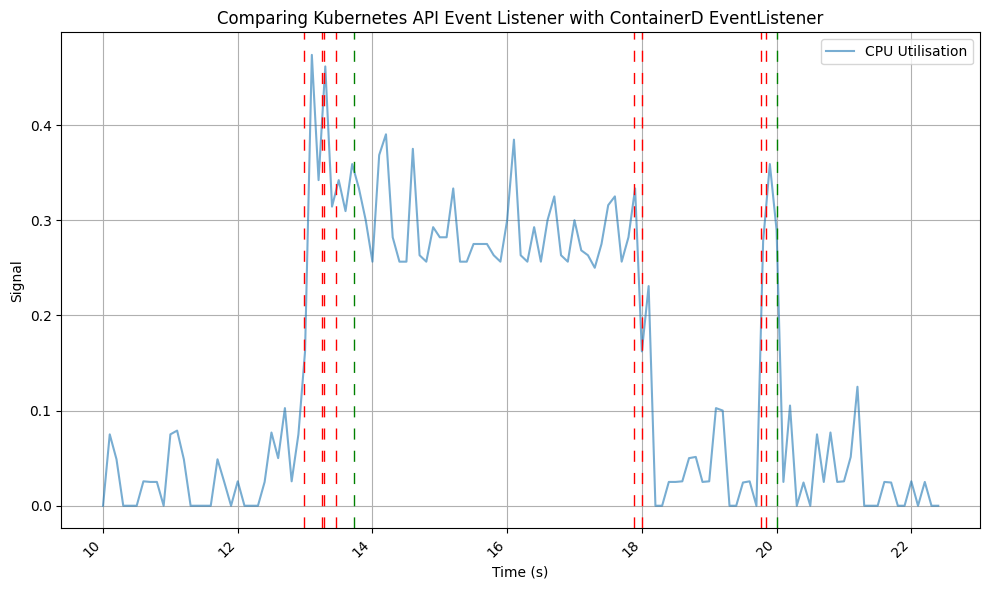

In [75]:
# 1. Parse time strings into datetime objects


start = datetime.strptime(data['time'][0], "%H:%M:%S.%f")
time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['time']]
container_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in container_events]
api_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in api_events]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects[100:225], data[key][100:225], label=key, alpha=.6)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

ymin, ymax = plt.ylim()
text_y_position = ymax * 0.95

for time in container_time[2:]:
    plt.axvline(x=time, color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)

for time in api_time[3:]:
    plt.axvline(x=time, color='green', alpha=1, linestyle=(0, (8, 8)), linewidth=1)

# count = 0
# for event in events_dict.keys():
#     # Assuming events[event] is a list of time strings for that event
#     event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
#     for event_time_obj in event_times_objects:
#         plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
#         count += 1

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Comparing Kubernetes API Event Listener with ContainerD EventListener")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/event-comparison-overall.png')
plt.show()

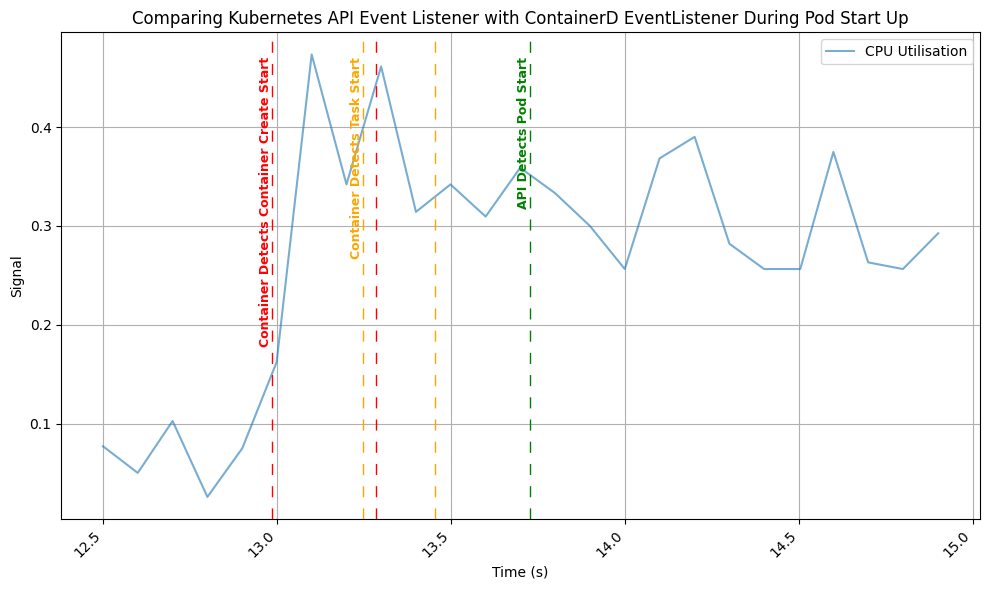

In [76]:
# 1. Parse time strings into datetime objects


start = datetime.strptime(data['time'][0], "%H:%M:%S.%f")
time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['time']]
container_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in container_events]
api_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in api_events]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects[125:150], data[key][125:150], label=key, alpha=.6)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

ymin, ymax = plt.ylim()
text_y_position = ymax * 0.95

plt.axvline(x=container_time[2], color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(container_time[2], text_y_position, 'Container Detects Container Create Start',
         rotation=90, va='top', color='red', ha='right', fontsize=9, weight='bold')
plt.axvline(x=container_time[3], color='orange', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(container_time[3], text_y_position, 'Container Detects Task Start',
         rotation=90, va='top', color='orange', ha='right', fontsize=9, weight='bold')
plt.axvline(x=container_time[4], color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.axvline(x=container_time[5], color='orange', alpha=1, linestyle=(0, (8, 8)), linewidth=1)


plt.text(api_time[3], text_y_position, 'API Detects Pod Start',
         rotation=90, va='top', color='green', ha='right', fontsize=9, weight='bold')
plt.axvline(x=api_time[3], color='green', alpha=1, linestyle=(0, (8, 8)), linewidth=1)

# count = 0
# for event in events_dict.keys():
#     # Assuming events[event] is a list of time strings for that event
#     event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
#     for event_time_obj in event_times_objects:
#         plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
#         count += 1

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Comparing Kubernetes API Event Listener with ContainerD EventListener During Pod Start Up")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/event-comparison-start.png')
plt.show()

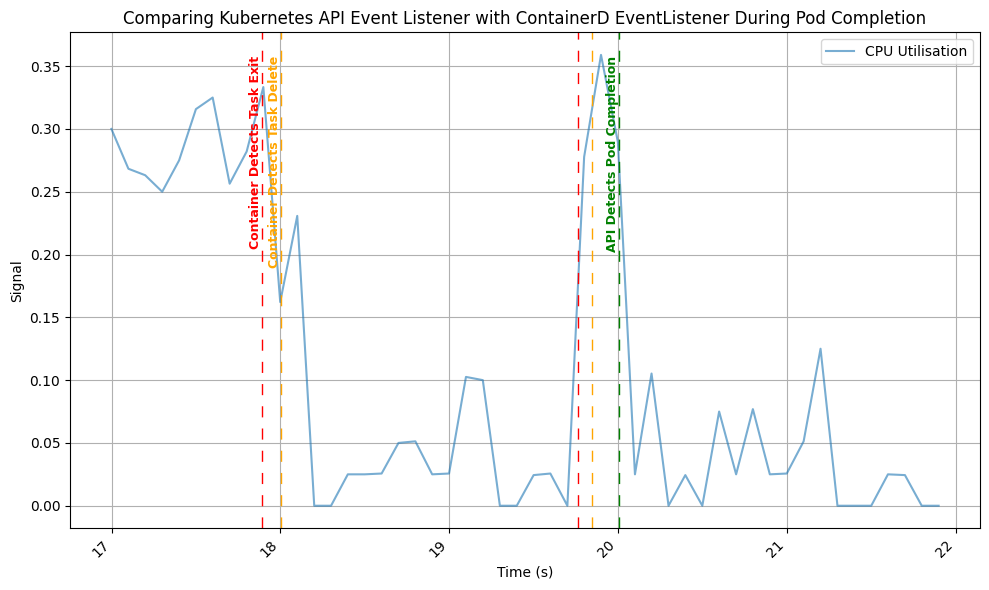

In [77]:
# 1. Parse time strings into datetime objects


start = datetime.strptime(data['time'][0], "%H:%M:%S.%f")
time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['time']]
container_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in container_events]
api_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in api_events]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects[170:220], data[key][170:220], label=key, alpha=.6)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

ymin, ymax = plt.ylim()
text_y_position = ymax * 0.95

plt.axvline(x=container_time[6], color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(container_time[6], text_y_position, 'Container Detects Task Exit',
         rotation=90, va='top', color='red', ha='right', fontsize=9, weight='bold')
plt.axvline(x=container_time[7], color='orange', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(container_time[7], text_y_position, 'Container Detects Task Delete',
         rotation=90, va='top', color='orange', ha='right', fontsize=9, weight='bold')
plt.axvline(x=container_time[8], color='red', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.axvline(x=container_time[9], color='orange', alpha=1, linestyle=(0, (8, 8)), linewidth=1)


plt.text(api_time[4], text_y_position, 'API Detects Pod Completion',
         rotation=90, va='top', color='green', ha='right', fontsize=9, weight='bold')
plt.axvline(x=api_time[4], color='green', alpha=1, linestyle=(0, (8, 8)), linewidth=1)

# count = 0
# for event in events_dict.keys():
#     # Assuming events[event] is a list of time strings for that event
#     event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
#     for event_time_obj in event_times_objects:
#         plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
#         count += 1

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Comparing Kubernetes API Event Listener with ContainerD EventListener During Pod Completion")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/event-comparison-end.png')
plt.show()